In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

smart content aware noise removal could be one idea to improve.
working fine all images.
gaussianblur inbuilt works only on even window sizes

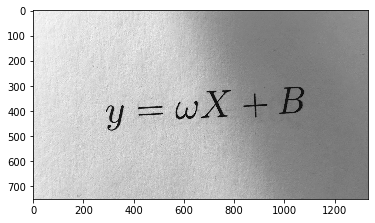

In [2]:
img = cv2.imread('../input/eq1_hr.jpg',0)
plt.imshow(img,cmap='gray')
plt.show()

In [3]:
def find_scan_screenshot(img):
    # return 0 for scan/screenshot and 1 for photograph
    total_pixels = img.shape[0]*img.shape[1]
    hist = cv2.calcHist([img],[0],None,[256],[0,256])
    prop = np.sum(hist[15:241])/total_pixels
    if prop<0.1:
        return 0
    else:
        return 1

In [4]:
def binarization_scans(img):
    # using inbuilt otsu's method..Implement later
    ret,_ = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return ret

def binarization_photos(img):
    high_res = 0
    if img.size>2000*1000:
        high_res = 1
    
    if high_res==1:
        img = cv2.GaussianBlur(img,(9,9),3) # fails for even
    
    window_size = int(min(img.shape[0],img.shape[1])/60)
    if window_size%2==0:
        window_size+=1 #cv2.adaptiveThreshold accepts only odd window sizes 

    thresh_img = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,window_size,10)
    
    return thresh_img


In [5]:
img_type = find_scan_screenshot(img)
if img_type==0:
    print("Scan/Screenshot")
else:
    print("Photograph")

Photograph


In [6]:
def morph_proc(img):
    img = 255 - img
    img[img==255] = 1
    kernel = np.ones((3,3))
    kernel1 = np.ones((5,5))
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel) 
    closed = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel) 
    filled = cv2.morphologyEx(closed, cv2.MORPH_DILATE, kernel1) 
    filled[filled==1] = 255
    return 255-filled

In [7]:
if img_type==0:
    new_img = binarization_scan(img)
else:
    new_img = binarization_photos(img)
    new_img = morph_proc(new_img)

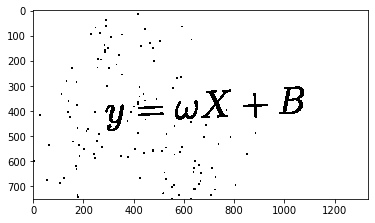

In [8]:
plt.imshow(new_img,cmap='gray')